## CS655 Computer Networks

### Analyzing Transmission Policies for Adaptive Video

#### Experiment 1: Constant Bitrate

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving constant_bitrate.zip to constant_bitrate (1).zip
User uploaded file "constant_bitrate.zip" with length 3724 bytes


In [ ]:
!unzip constant_bitrate.zip

Archive:  constant_bitrate.zip
  inflating: basic.csv               
  inflating: netflix.csv             
  inflating: sara.csv                


In [ ]:
basic_filename = "basic.csv"
netflix_filename = "netflix.csv"
sara_filename = "sara.csv"

The last cell will read in the data and plot the video rate against time (higher rate means higher quality video!)

The background of the plot will be shaded according to the video playback status: a light cyan background means the video is playing, while a light pink background means the video is buffering ("frozen").

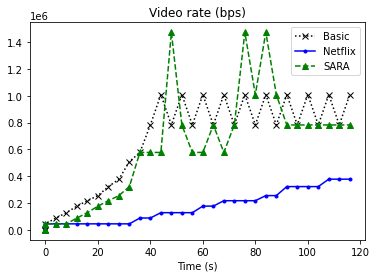

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


c = {'INITIAL_BUFFERING': 'violet', 'PLAY': 'lightcyan', 'BUFFERING': 'lightpink'}

basic = pd.read_csv(basic_filename)
basic = basic.loc[basic.CurrentPlaybackState.isin(c.keys() )]

netflix = pd.read_csv(netflix_filename)
netflix = netflix.loc[netflix.CurrentPlaybackState.isin(c.keys() )]

sara = pd.read_csv(sara_filename)
sara = sara.loc[sara.CurrentPlaybackState.isin(c.keys() )]

# states = pd.DataFrame({'startState': basic.CurrentPlaybackState[0:-2].values, 'startTime': basic.EpochTime[0:-2].values,
#                         'endState':  basic.CurrentPlaybackState[1:-1].values, 'endTime':   basic.EpochTime[1:-1].values})
# for index, s in states.iterrows():
#   plt.axvspan(s['startTime'], s['endTime'],  color=c[s['startState']], alpha=1) 

plt.plot(basic[basic.Action!="Writing"].EpochTime, basic[basic.Action!="Writing"].Bitrate, 'xk:', label="Basic")
plt.plot(netflix[netflix.Action!="Writing"].EpochTime, netflix[netflix.Action!="Writing"].Bitrate, '.b-', label="Netflix")
plt.plot(sara[sara.Action!="Writing"].EpochTime, sara[sara.Action!="Writing"].Bitrate, '^g--', label="SARA")
plt.title("Video rate (bps)");
plt.xlabel("Time (s)");
plt.legend()
plt.show()

In [ ]:
def get_statistics(data):
  bitrate = data[data.Action!="Writing"].Bitrate.div(1000).mean()
  variance =  data[data.Action!="Writing"].Bitrate.div(1000).var()
  states = pd.DataFrame({'startState': data.CurrentPlaybackState[0:-2].values, 'startTime': data.EpochTime[0:-2].values,
                          'endState':  data.CurrentPlaybackState[1:-1].values, 'endTime':   data.EpochTime[1:-1].values})
  initial_beffering = 0
  interruption = 0
  
  for index, s in states.iterrows():
    if s['startState'] == "INITIAL_BUFFERING":
      initial_beffering += s['endTime'] - s['startTime']
    elif s['startState'] == "BUFFERING":
      interruption += s['endTime'] - s['startTime']
  return bitrate, variance, initial_beffering, interruption


In [ ]:
print('bitrate, variance, initial_beffering, interruption')
print(get_statistics(basic))
print(get_statistics(netflix))
print(get_statistics(sara))


bitrate, variance, initial_beffering, interruption
(624.6769393939394, 138519.3661861212, 0.00530982017517, 0)
(159.50039393939397, 15349.031583621214, 0.00433492660522, 0)
(577.5124545454546, 185967.67043225566, 0.00496816635132, 0)
